## Consumer's Utiity Maximization Problem

There are many consumers in an economy whose labor productivity $x$ and non-labor income $\pi$ are different. An individual consumer is endowed with one unit of time that can be used on either working to make money for consumption or enjoying as leisure. The wage per hour is given by $w$ that is determined in the market. The utility function of the consumer is given by $ u(c, l) = c^{\frac{1}{3}} l^{\frac{2}{3}}$, where $c$ and $l$ denote consumption and leisure respectively.

Q1. Solve an individual consumer's utility maximization problem to derive the optimal consumption ($c^*$), leisure ($l^*$) and the labor supply ($N^s$). Be careful for the corner solutions. Write the Latex code for your answers or include the scanned image file in the following Markdown cell. When you submit your Jupyter Notebook file, **you should also upload your image file together**

include answer file here

##소비자의 효용 극대화 문제
먼저, 소비자는 효용을 극대화하려고 한다. 이때, 예산제약이 존재하게 된다. \\
소비자는 노동을 하지 않아도 비노동소득 $\pi$ 를 얻고, \\
$l$ 만큼 여가를 하고 나머지 $1-l$ 만큼의 시간을 노동에 투자한다. \\
따라서 노동 공급은 $N^{s} = 1-l$ 이 되고, \\

$x$가 노동 생산성으로 생산성이 좋아지면 같은 시간을 투자해도 생산성이 좋아지므로 \\
노동에 투입하는 시간(노동공급) $1-l$ 에 곱으로 연결되어 생산성을 나타낸다. \\
이때, 임금이 $w$ 이므로 예산제약은 \\
$c \leq \pi + (1-l)xw$ 이 된다. \\
이때, 등호가 성립할 때까지 소비를 증가시켜야 소비자가 효용을 극대화할 수 있으므로, \\
예산제약은 $c = \pi + (1-l)xw$ 로 쓸 수 있고, \\

소비자의 효용 극대화 문제는 다음과 같다. \\

### $max : u(c, \ l) = c^{\frac13}l^{\frac23}$
### $s.t \quad c = \pi + (1-l)xw$

라그랑지안을 이용하면, \\

$\mathcal{L} = c^{\frac13}l^{\frac23} + \lambda \left\{ \pi + (1-l)xw - c \right\} $ \\
이고, \\
$\frac{\partial \mathcal{L}}{\partial c} = \frac13 c^{-\frac23}l^{\frac23} - \lambda$ \\
$\frac{\partial \mathcal{L}}{\partial l} = \frac23 c^{\frac13}l^{-\frac13} - \lambda xw$ \\
$\frac{\partial \mathcal{L}}{\partial \lambda} = \pi + (1-l)xw - c$ \\

1) $ 2\pi < xw$ \\
$\frac{\partial \mathcal{L}}{\partial c} = 0$ \\
$\frac{\partial \mathcal{L}}{\partial l} = 0$ \\
$\frac{\partial \mathcal{L}}{\partial \lambda} = 0$ 이므로, \\

$ c^* = \frac{\pi + xw}{3} $ \\
$ l^* = \frac{2(\pi + xw)}{3xw} $ \\
$ N^{s} = \frac{xw - 2\pi}{3xw} $ 이다. \\

2) $ -\pi < xw \leq 2\pi$ \\
이때는, $l \geq 1$ 이므로, $l = 1$이 되어, \\

$ c^* = \pi $ \\
$ l^* = 1 $ \\
$ N^{s} = 0 $ 이다. \\

2) $ xw \leq -\pi$ \\
이때는, $l \leq 0$ 이므로, $l = 0$이 되어, \\

$ c^* = \pi + xw $ \\
$ l^* = 0 $ \\
$ N^{s} = 1 $ 이다. \\

Q2. Write the Python function to compute the $(c^*, l^*, N^s$) for an individual consumer.

In [ ]:
# your code here

# Consumer라는 class를 정의해서, x, pi, w가 주어지면 c^*, l^*, N^s를 계산하게 함.

class Consumer:

    def __init__(self, x, p, w):
        self.x = x
        self.p = p
        self.w = w

    def c_star(self):
        if self.x * self.w > 2 * self.p:
            return (self.p + self.x * self.w) / 3
        elif -self.p < self.x * self.w <= 2 * self.p:
            return self.p
        else:
            return self.p + self.x * self.w
    
    def l_star(self):
        if self.x * self.w > 2 * self.p:
            return 2 * (self.p + self.x * self.w) / (3 * self.x * self.w)
        elif -self.p < self.x * self.w <= 2 * self.p:
            return 1
        else:
            return 0

    def Ns_star(self):
        if self.x * self.w > 2 * self.p:
            return (self.x * self.w - 2 * self.p) / (3 * self.x * self.w)
        elif -self.p < self.x * self.w <= 2 * self.p:
            return 0
        else:
            return 1

Q3. For the time being, assume that $w=2$ and $\sigma_x=0.3$. Then do the following using the function that you wrote above. 

Q3-1. Draw the graphs for the optimal consumption and leisure for 30 individuals whose log productivities are equally distributed over the range $\log{x} \in [-3\sigma_x, +3\sigma_x]$, but non-labor incomes are identical at $\pi=\frac{1}{2}$.

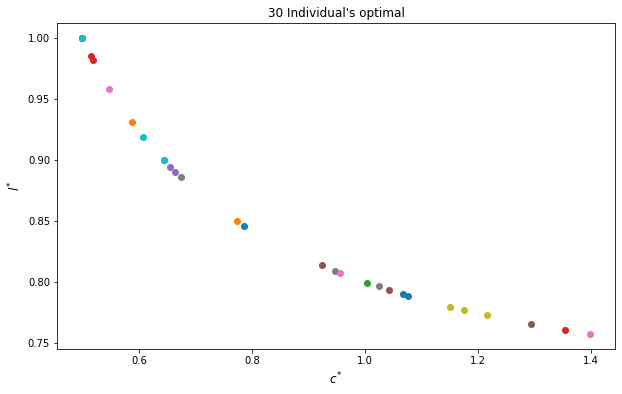

In [ ]:
# your code here

import numpy as np

sig = 0.3

# logx라는 30개의 random number를 주어진 범위에서 뽑아 exp를 이용하여 x로 바꾼다.

logx = np.random.uniform(-3*sig, 3*sig, 30)
x = np.exp(logx)

# onsumers라는 np.array에 x, c^*, l^*, N^s를 low에 담은 30개의 column을 만든다.

consumers = np.zeros((30, 4))

for i in range(30):
    consumer = Consumer(x=x[i], p=1/2, w=2)
    consumers[i][0] = x[i]
    consumers[i][1] = consumer.c_star()
    consumers[i][2] = consumer.l_star()
    consumers[i][3] = consumer.Ns_star()

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
fig, ax = plt.subplots()

for i in range(30):
    ax.scatter(consumers[i][1], consumers[i][2])
ax.set_xlabel('$c^{*}$', fontsize=12)
ax.set_ylabel('$l^{*}$', fontsize=12)
plt.title("30 Individual's optimal")
plt.show()

Q3-2. Draw the graphs for the optimal consumption and leisure for 30 individuals whose productivities are identical at $x=\sigma_x$, but non-labor incomes are equally distributed over the whole range of $\pi$, i.e., $\pi \in [0, 1]$.

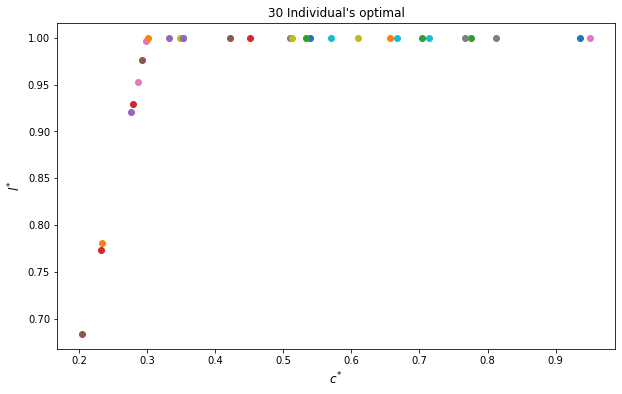

In [ ]:
# your code here

# p라는 0과 1사이의 random number 30개를 뽑는다.

p = np.random.uniform(0, 1, 30)

# onsumers라는 np.array에 x, c^*, l^*, N^s를 low에 담은 30개의 column을 만든다.

consumers = np.zeros((30, 4))

for i in range(30):
    consumer = Consumer(x=sig, p=p[i], w=2)
    consumers[i][0] = x[i]
    consumers[i][1] = consumer.c_star()
    consumers[i][2] = consumer.l_star()
    consumers[i][3] = consumer.Ns_star()

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
fig, ax = plt.subplots()

for i in range(30):
    ax.scatter(consumers[i][1], consumers[i][2])
ax.set_xlabel('$c^{*}$', fontsize=12)
ax.set_ylabel('$l^{*}$', fontsize=12)
plt.title("30 Individual's optimal")
plt.show()

Q3-3. Draw the graphs (3-D surface plots) for the optimal consumption and leisure for individuals whose log productivities are equally distributed over the range of $\log{x} \in [-3\sigma_x, +3\sigma_x]$ and non-labor incomes are equally distributed over the rnage of $\pi\in [0, \bar{\pi}]$.

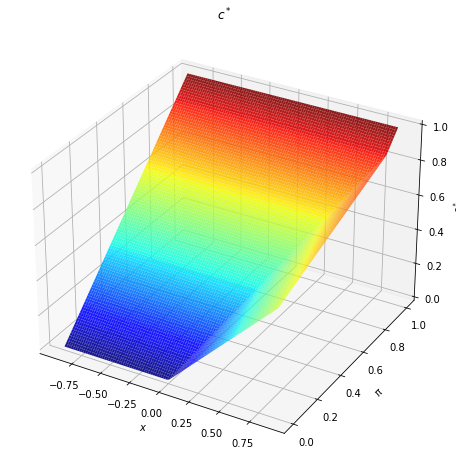

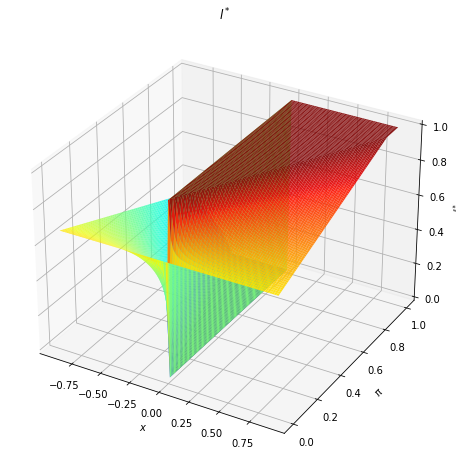

In [ ]:
# your code here

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# logx와 pi가 주어진 범위 안에서 균등분포하므로 균등한 간격으로 100개를 뽑는다.
# logx는 np.exp를 이용하여 x로 바꿔준다.

logx = np.linspace(-3*sig, 3*sig, 100)
x = np.exp(logx)
p = np.linspace(0, 1, 100)
x, p = np.meshgrid(logx, p)

w = 2

# c^*를 계산하는 식을 numpy를 이용하여 정의하면, surface를 그릴 수 있으므로, np.maximum과 np.minimum을 이용하여 재정의해준다.

def c_star(x, p):
    return np.maximum(np.minimum((p + x * w) / 3, p + x*w), p)

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(projection='3d')
ax1.plot_surface(x,
                 p,
                 c_star(x, p),
                 rstride=1, cstride=1,
                 cmap=cm.jet,
                 alpha=0.9)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\pi$')
ax1.set_zlabel('$c^*$')
plt.title('$c^*$')
plt.show()

# l^*를 계산하는 식을 numpy를 이용하여 정의하면, surface를 그릴 수 있으므로, np.maximum과 np.minimum을 이용하여 재정의해준다.

def l_star(x, p):
    return np.maximum(np.minimum(2 * (p + x * w) / (3 * x * w), 1), 0)

fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(projection='3d')
ax2.plot_surface(x,
                 p,
                 l_star(x, p),
                 rstride=1, cstride=1,
                 cmap=cm.jet,
                 alpha=0.9)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$\pi$')
ax2.set_zlabel('$l^*$')
plt.title('$l^*$')
plt.show()

Q3-4. Draw the labor supply curve for the following four individuals as the market wage varies over the range of $w\in[1,4]$.

- Individual 1: $\log{x} = -\sigma_x$ and $\pi = 0.4$
- Individual 2: $\log{x} = -\sigma_x$ and $\pi = 0.6$
- Individual 3: $\log{x} = \sigma_x$ and $\pi = 0.4$
- Individual 4: $\log{x} = \sigma_x$ and $\pi = 0.6$

In [ ]:
# 시간이 너무 오래걸려서 다음 셀에 나오는 아래 코드로 바꿨습니다.

# # your code here

# # w를 1부터 4까지 균등하게 600개로 나눈다.

# w = np.linspace(1, 4, 600)

# consumers = np.zeros((4, 4))

# plt.rcParams['figure.figsize'] = (10,6)
# fig, ax = plt.subplots()

# # w의 원소를 하나씩 대입하면서 임금에 따른 각 개인의 노동 공급량을 점찍는다.
# # 개인 1은 빨강, 개인 2는 주황, 개인 3은 초록, 개인 4는 파랑으로 나타내었다.

# for i in range(600):
#     consumer1 = Consumer(x=np.exp(-sig), p=0.4, w=w[i])
#     consumer2 = Consumer(x=np.exp(-sig), p=0.6, w=w[i])
#     consumer3 = Consumer(x=np.exp(sig), p=0.4, w=w[i])
#     consumer4 = Consumer(x=np.exp(sig), p=0.6, w=w[i])
#     plt.scatter(consumer1.Ns_star(), w[i], color='red', s=10)
#     plt.scatter(consumer2.Ns_star(), w[i], color='orange', s=10)
#     plt.scatter(consumer3.Ns_star(), w[i], color='green', s=10)
#     plt.scatter(consumer4.Ns_star(), w[i], color='blue', s=10)

# plt.xlabel('$N^s$', fontsize=12)
# plt.ylabel('$w$', fontsize=12)
# plt.show()

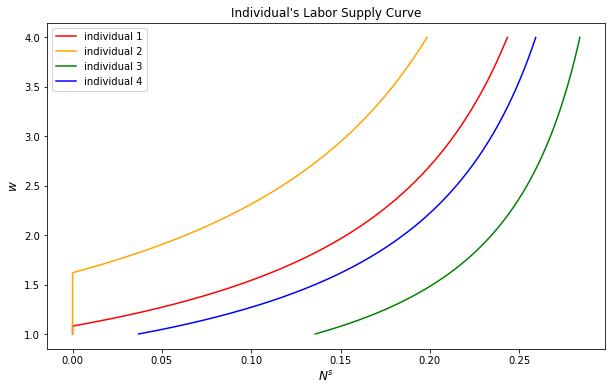

In [ ]:
# your code here

# Ns를 계산하는 식을 numpy를 이용하여 정의하면, 한번에 그래프를 그릴 수 있으므로, np.maximum과 np.minimum을 이용하여 재정의해준다.

def Ns_star(w):
    return np.maximum(np.minimum((x * w - 2 * p) / (3 * x * w), 1), 0)

w = np.linspace(1, 4, 600)

# x와 pi를 바꾸어 가면서 그래프를 추가해준다. 이때, 가격변수가 y축에 오도록 그렸다.

x=np.exp(-sig)
p=0.4

plt.plot(Ns_star(w), w, color='red', label='individual 1')

p=0.6

plt.plot(Ns_star(w), w, color='orange', label='individual 2')

x=np.exp(sig)
p=0.4

plt.plot(Ns_star(w), w, color='green', label='individual 3')

p=0.6

plt.plot(Ns_star(w), w, color='blue', label='individual 4')

plt.xlabel('$N^s$', fontsize=12)
plt.ylabel('$w$', fontsize=12)
plt.legend()
plt.title("Individual's Labor Supply Curve")
plt.show()

Q4. Suppose that there are 100,000 individuals in the economy whose labor productivities are drawn from the following distributionis: $\log{x}\sim N(0, \sigma_x^2)$. The non-labor incomes of one half of the individuals are 0.4 and those of the other half are 0.6. Each individual behaves according to the utility maximization problem described above. Using the function that you write above, do the following.  


Q4-1. Generate 100,000 individuals and compute their labor supply assuming the market wage being equal to 2. Then draw histograms of the individual labor supplies of the two groups.

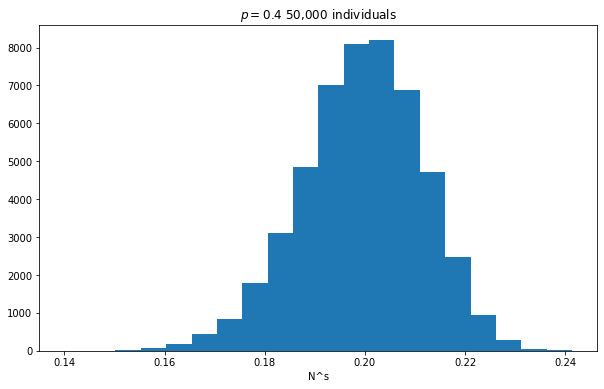

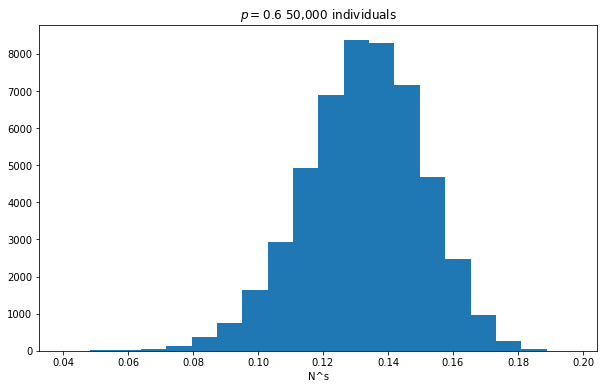

In [ ]:
# your code here

# 100,000개의 logx값을 평균이 0이고 분산이 sig^2인 정규분포에서 뽑는다. 뽑아서 np.exp를 이용하여 x로 바꿔준다.

logx = np.random.normal(loc=0, scale=sig**2, size=100000)
x = np.exp(logx)
w=2

# pi가 0.4인 50,000명의 노동 공급량을 구해 20개의 bin을 가진 histogram으로 나타낸다.

consumers1 = np.zeros((50000,1))
for i in range(50000):
    consumers1[i][0] = Consumer(x=x[i], p=0.4, w=w).Ns_star()
plt.hist(consumers1, bins=20)
plt.title('$p=0.4$ 50,000 individuals')
plt.xlabel('N^s')
plt.show()

# pi가 0.6인 50,000명의 노동 공급량을 구해 20개의 bin을 가진 histogram으로 나타낸다.

consumers2 = np.zeros((50000,1))
for i in range(50000):
    consumers2[i][0] = Consumer(x=x[50000+i], p=0.6, w=w).Ns_star()
plt.hist(consumers2, bins=20)
plt.title('$p=0.6$ 50,000 individuals')
plt.xlabel('N^s')
plt.show()

Q4-2. Then draw histograms of the individual labor supplies of the whole economy.

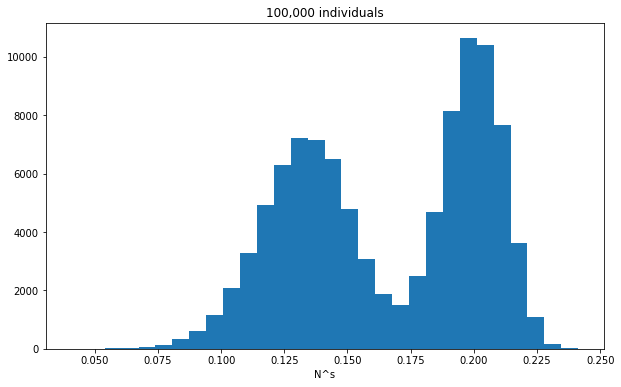

In [ ]:
# your code here

# 위에서 구한 pi가 0.4, 0.6인 개인의 노동 공급을 하나의 np.array로 합쳐 30개의 bin을 가진 histogram으로 나타낸다.

consumers = np.concatenate((consumers1, consumers2))
plt.hist(consumers, bins=30)
plt.xlabel('N^s')
plt.title('100,000 individuals')
plt.show()

Q4-3. Draw the aggregate labor supply curve as the market wage varies over the range of $w\in[1,4]$.


In [ ]:
# 시간이 너무 오래걸려서 다음 셀에 나오는 아래 코드로 바꿨습니다.


# # your code here

# # w가 주어지면 pi가 0.4, 0.6인 각각 50,000명의 노동 공급을 계산하는 함수를 정의한다.

# def consumers1(w):
#     consumers1 = np.zeros((50000,1))
#     for i in range(50000):
#         consumers1[i][0] = Consumer(x=x[i], p=0.4, w=w).Ns_star()
#     return consumers1

# def consumers2(w):
#     consumers2 = np.zeros((50000,1))
#     for i in range(50000):
#         consumers2[i][0] = Consumer(x=x[50000+i], p=0.6, w=w).Ns_star()
#     return consumers2

# # pi가 0.4인 50,000명과 pi가 0.6인 50,000명의 노동 공급을 더해주는 노동 공급함수를 정의한다.

# def labor_supply_curve(w):
#     return np.sum(consumers1(w)) + np.sum(consumers2(w))

# # w를 1부터 4까지 변화시키면서 노동 공급량을 점찍어준다.

# wage = np.linspace(1, 4, 300)

# for j in range(300):
#     plt.scatter(labor_supply_curve(wage[j]), wage[j], color='red', s=10)
# plt.xlabel('$\sum N^s$')
# plt.ylabel('$w$')
# plt.show

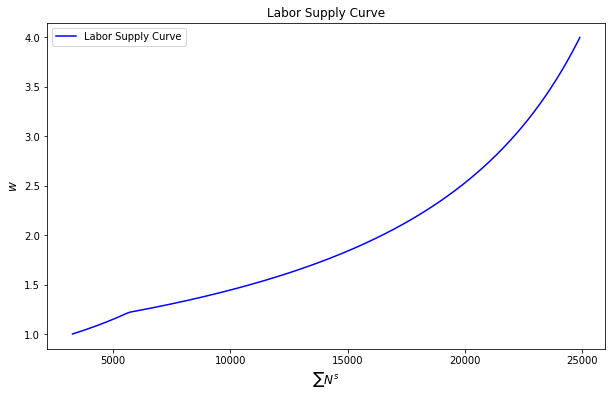

In [ ]:
# your code here

# Ns를 계산하는 식을 numpy를 이용하여 정의하면, 한번에 그래프를 그릴 수 있으므로, np.maximum과 np.minimum을 이용하여 재정의해준다.
# 이때 x라는 변수가 아래와 겹치므로 x0로 바꾸어 주었다.

def Ns_star(w):
    return np.maximum(np.minimum((np.dot(x0, w) - 2 * p) / (3 * np. dot(x0, w)), 1), 0)

logx = np.random.normal(loc=0, scale=sig**2, size=100000)
x = np.exp(logx)

w = np.linspace(1, 4, 300)

# Labor_Supply를 0으로 정의하고 pi가 0.4인 개인 50,000명의 공급을 더해준 다음, 0.6인 개인 50,000명의 개인도 더해주었다.

Labor_Supply = 0
p = 0.4
for i in range(50000):
    x0 = x[i]
    Labor_Supply += Ns_star(w)

p = 0.6
for j in range(50000):
    x0 = x[50000+i]
    Labor_Supply += Ns_star(w)

# Labor_Supply를 그려주었다. 이때, 가격변수가 y축에 오도록 그렸다.

plt.plot(Labor_Supply, w, color='blue', label='Labor Supply Curve')

plt.xlabel('$\sum N^s$', fontsize=12)
plt.ylabel('$w$', fontsize=12)
plt.legend()
plt.title('Labor Supply Curve')
plt.show()